# Create a Basic Mapping of Broad IDs to MOAs and Targets

Here, I add the `pert_id` column to an additional file.
This file contains only the essential mapping columns between cell painting data and drug annotations.

The primary addition is truncating the `broad_id` column into the `pert_id` column (e.g. `BRD-K89787693-001-01-1` becomes `BRD-K89787693`) and describing the impact.

I create a new file (called `repurposing_info_basic.tsv`) that only contains the unique columns `pert_id`, `pert_iname`, `moa`, and `target`.

The `broad_id` column contains additional supplier, batch and aliquot information.
The `pert_id` column is the essential information that is used to directly map compounds to profiles.

In [1]:
%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
import os
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
use_cols = ["pert_id", "pert_iname", "moa", "target"]

<IPython.core.display.Javascript object>

## Load Data and Create the `pert_id` column

In [4]:
annotation_df = pd.read_csv("repurposing_info.tsv", sep="\t")

annotation_df = annotation_df.assign(pert_id=annotation_df.broad_id.str.slice(0, 13))

print(annotation_df.shape)
annotation_df.head()

(13553, 19)


,broad_id,pert_iname,clinical_phase,moa,target,disease_area,indication,qc_incompatible,purity,vendor,catalog_no,vendor_name,expected_mass,smiles,InChIKey,pubchem_cid,deprecated_broad_id,InChIKey14,pert_id
0,BRD-K76022557-003-28-9,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,98.90,MedChemEx,HY-12723A,Apomorphine (hydrochloride hemihydrate),267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,VMWNQDUVQKEIOC,BRD-K76022557
1,BRD-K76022557-003-02-7,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,97.34,Tocris,2073,(R)-(-)-Apomorphine hydrochloride,267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,VMWNQDUVQKEIOC,BRD-K76022557
2,BRD-K76022557-003-29-9,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,97.36,Tocris,2073,(R)-(-)-Apomorphine hydrochloride,267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,VMWNQDUVQKEIOC,BRD-K76022557
3,BRD-K76022557-001-03-9,(R)-(-)-apomorphine,Launched,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...,neurology/psychiatry,Parkinson's Disease,0,95.80,Selleck,S4350,R-(-)-Apomorphine HCl Hemihydrate,267.126,CN1CCc2cccc-3c2[C@H]1Cc1ccc(O)c(O)c-31,VMWNQDUVQKEIOC-CYBMUJFWSA-N,6005.0,NaN,VMWNQDUVQKEIOC,BRD-K76022557
4,BRD-K75516118-001-04-1,(R)-(-)-rolipram,Phase 1,phosphodiesterase inhibitor,PDE4A|PDE4B|PDE4C|PDE4D|PDE5A,NaN,NaN,0,93.92,Tocris,1349,(R)-(-)-Rolipram,275.152,COc1ccc(cc1OC1CCCC1)[C@@H]1CNC(=O)C1,HJORMJIFDVBMOB-LBPRGKRZSA-N,448055.0,NaN,HJORMJIFDVBMOB,BRD-K75516118


<IPython.core.display.Javascript object>

## Describe the Effect of adding `pert_id`

How many columns are replicated?

In [5]:
# There are no duplicate `broad_ids`
annotation_df.broad_id.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [6]:
pert_counts = annotation_df.pert_id.value_counts()
pert_counts.head(10)

BRD-K41260949    8
BRD-K68432770    8
BRD-A34299591    8
BRD-K06519765    7
BRD-K71879491    7
BRD-K08547377    7
BRD-K52756523    7
BRD-K35458079    7
BRD-K85402309    6
BRD-K20672254    6
Name: pert_id, dtype: int64

<IPython.core.display.Javascript object>

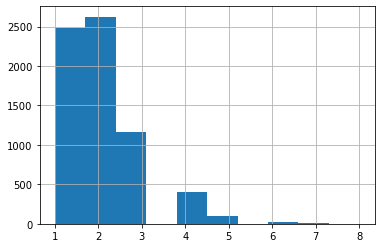

<IPython.core.display.Javascript object>

In [7]:
pert_counts.hist()

In [8]:
# How many pert ids are duplicated?
num_duplicate = (pert_counts > 1).sum()
percent_duplicate = (num_duplicate / pert_counts.shape[0]) * 100

print(
    "There are {} ({}%) duplicated `pert_ids`".format(num_duplicate, percent_duplicate)
)

There are 4326 (63.56156332647663%) duplicated `pert_ids`


<IPython.core.display.Javascript object>

In [9]:
# Examples of duplicate pert_id columns
top_duplicated_pert_id = pert_counts.head(1).index.values[0]
annotation_df.query("pert_id == @top_duplicated_pert_id")

,broad_id,pert_iname,clinical_phase,moa,target,disease_area,indication,qc_incompatible,purity,vendor,catalog_no,vendor_name,expected_mass,smiles,InChIKey,pubchem_cid,deprecated_broad_id,InChIKey14,pert_id
12614,BRD-K41260949-236-15-0,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,96.04,Selleck,S1168,Valproic acid sodium salt (Sodium valproate),144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,NIJJYAXOARWZEE,BRD-K41260949
12615,BRD-K41260949-236-18-4,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,41.51,EMDBio,676380-5GM,"Valproic Acid, Sodium Salt",144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,NIJJYAXOARWZEE,BRD-K41260949
12616,BRD-K41260949-236-17-6,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,31.39,Enzo,550-304,"Valproic Acid, Sodium Salt",144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,NIJJYAXOARWZEE,BRD-K41260949
12617,BRD-K41260949-001-18-2,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,65.88,Sigma,MFCD00002672,2-propylpentanoic acid,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,NIJJYAXOARWZEE,BRD-K41260949
12618,BRD-K41260949-236-21-8,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,2.38,Tocris,2815,"Valproic acid, sodium salt",144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,NIJJYAXOARWZEE,BRD-K41260949
12619,BRD-K41260949-236-20-0,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,42.10,Selleck,S1703,Divalproex sodium,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,BRD-M19962486-236-03-2,NIJJYAXOARWZEE,BRD-K41260949
12620,BRD-K41260949-236-16-8,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,96.83,MicroSource,1500606,VALPROATE SODIUM,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,NaN,NIJJYAXOARWZEE,BRD-K41260949
12621,BRD-K41260949-236-19-2,valproic-acid,Launched,benzodiazepine receptor agonist|HDAC inhibitor,ABAT|ACADSB|ALDH5A1|HDAC1|HDAC2|HDAC9|OGDH|SCN...,neurology/psychiatry,epilepsy|seizures|seizures,0,23.50,Selleck,S1703,Divalproex Sodium,144.115,CCCC(CCC)C(O)=O,NIJJYAXOARWZEE-UHFFFAOYSA-N,3121.0,BRD-M19962486-236-02-4,NIJJYAXOARWZEE,BRD-K41260949


<IPython.core.display.Javascript object>

## Select only essential columns and determine/reconcile any discrepancies

In [10]:
basic_df = annotation_df.loc[:, use_cols].drop_duplicates()

print(basic_df.shape)
basic_df.head()

(6806, 4)


,pert_id,pert_iname,moa,target
0,BRD-K76022557,(R)-(-)-apomorphine,dopamine receptor agonist,ADRA2A|ADRA2B|ADRA2C|CALY|DRD1|DRD2|DRD3|DRD4|...
4,BRD-K75516118,(R)-(-)-rolipram,phosphodiesterase inhibitor,PDE4A|PDE4B|PDE4C|PDE4D|PDE5A
7,BRD-K62353271,(R)-baclofen,benzodiazepine receptor agonist,GABBR1|GABBR2
9,BRD-K65856711,(S)-(+)-rolipram,phosphodiesterase inhibitor,PDE4B|PDE4D
12,BRD-K89787693,"[sar9,met(o2)11]-substance-p",tachykinin antagonist,TACR1


<IPython.core.display.Javascript object>

In [11]:
duplicated_pert_ids = basic_df.pert_id.loc[basic_df.pert_id.duplicated()]
assert len(duplicated_pert_ids) == 0, "Warning! There are duplicated pert_ids"

<IPython.core.display.Javascript object>

In [12]:
output_file = "repurposing_simple.tsv"
basic_df.to_csv(output_file, index=False, sep="\t")

<IPython.core.display.Javascript object>